In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [9]:
def f(x):
    return 3*x**2 - 4*x + 5

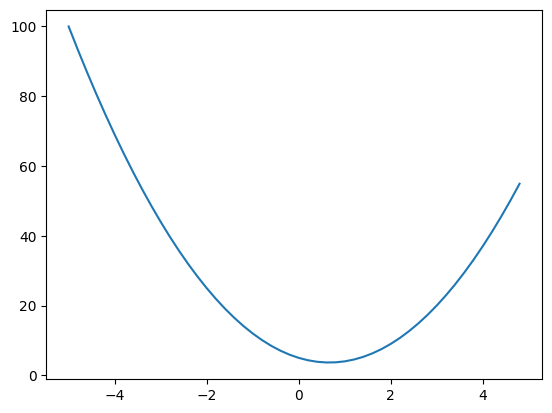

In [10]:
xs = np.arange(-5,5,0.2)
ys = f(xs)

plt.plot(xs, ys)

In [11]:
a = 2.0
b = -3.0
c = 10.0

d = a * b + c



In [12]:
h = 0.0001

d1 = a * b +c
b += h
d2 = a * b + c

print((d2 - d1) /h)

2.0000000000042206


The neural network is a huge mathematical expression. That is why need a datastructure to hold it. Below is the basic structure of the said architecture.

In [56]:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+' )
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*' )
        return out


a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0 , label = 'c')
e = a *b ; e.label = 'e' 
d = e + c ; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0)

#### Graphviz is a graph visualization library

In [57]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "%s | {data %.4f} | grad %.4f" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

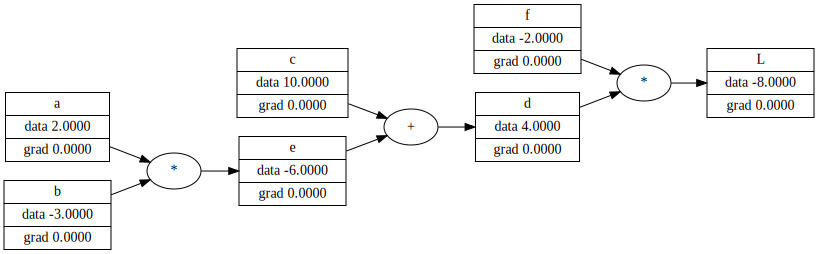

In [58]:
draw_dot(L)

So, the involvement of each value creates a different layer.

In [64]:
def lol():

    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0 , label = 'c')
    e = a *b ; e.label = 'e' 
    d = e + c ; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0 , label = 'c')
    e = a *b ; e.label = 'e' 
    d = e + c ; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data + h

    print((L2 - L1)/h )

lol()



1.000000000000334
